# Predicting Water Point Functionalit - Model Building

Introductory Text

## Package Loading

In [1]:
library(randomForest) #Random Forest
library(gbm) # Gradient Boosting
library(e1071)  # Support Vector Machines
library(IRdisplay)

Warning message:
"package 'randomForest' was built under R version 3.3.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'gbm' was built under R version 3.3.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.3.3"Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1
Warning message:
"package 'e1071' was built under R version 3.3.3"

## Data Loading & Partitioning

**Load the challenge's train and test sets data, after completing cleaning and feature engineering using MySQL**

In [2]:
full_train = read.csv("prepared_trainData.csv")
challenge_test = read.csv("prepared_testData.csv")

In [3]:
head(full_train)

id,status_group,amount_tsh,gps_height,longitude,latitude,basin,population,public_meeting,scheme_management,...,funder_installer_nonfunctional,region_code_functional,region_code_needsrepair,region_code_nonfunctional,lga_functional,lga_needsrepair,lga_nonfunctional,ward_functional,ward_needsrepair,ward_nonfunctional
1817,functional,50,1294,36.78452,-3.371551,Pangani,1500,TRUE,VWC,...,0.1667000,0.6541,0.0575,0.2884,0.6511,0.0317,0.3171,0.6000,0.1556,0.2444
53558,functional,0,1344,36.76765,-3.367851,Pangani,130,0,,...,0.0400000,0.6541,0.0575,0.2884,0.6511,0.0317,0.3171,0.6000,0.1556,0.2444
46897,functional,0,1315,36.78232,-3.369370,Pangani,400,TRUE,WUA,...,0.4346952,0.6541,0.0575,0.2884,0.6511,0.0317,0.3171,0.6000,0.1556,0.2444
70666,non functional,0,0,33.44780,-3.247513,Lake Victoria,0,TRUE,WUG,...,0.5852000,0.5602,0.1273,0.3125,0.6156,0.0742,0.3103,0.4706,0.0294,0.5000
41583,functional,0,-41,39.81291,-7.889986,Rufiji,100,TRUE,VWC,...,0.3342000,0.4780,0.0195,0.5024,0.6894,0.1212,0.1894,0.5909,0.2273,0.1818
24593,functional,0,1703,35.56135,-3.806879,Internal,456,0,WUG,...,0.4636000,0.6235,0.0606,0.3159,0.6431,0.0337,0.3232,0.8889,0.0556,0.0556


In [4]:
head(challenge_test)

id,amount_tsh,gps_height,longitude,latitude,basin,population,public_meeting,scheme_management,permit,...,funder_installer_nonfunctional,region_code_functional,region_code_needsrepair,region_code_nonfunctional,lga_functional,lga_needsrepair,lga_nonfunctional,ward_functional,ward_needsrepair,ward_nonfunctional
50785,0,1996,35.29080,-4.059696,Internal,321,TRUE,Parastatal,TRUE,...,0.1027,0.6235,0.0606,0.3159,0.6431,0.0337,0.3232,0.6000,0.1600,0.2400
51630,0,1569,36.65671,-3.309214,Pangani,300,TRUE,VWC,TRUE,...,0.4166,0.6541,0.0575,0.2884,0.6989,0.0383,0.2628,0.5696,0.0886,0.3418
17168,0,1567,34.76786,-5.004344,Internal,500,TRUE,VWC,,...,0.3342,0.4830,0.0612,0.4558,0.4402,0.0623,0.4975,0.2955,0.0682,0.6364
45559,0,267,38.05805,-9.418672,Ruvuma / Southern Coast,250,,VWC,TRUE,...,0.9394,0.3489,0.0630,0.5880,0.2532,0.0195,0.7273,0.2000,0.0000,0.8000
49871,500,1260,35.00612,-10.950412,Ruvuma / Southern Coast,60,,Water Board,TRUE,...,0.1250,0.5606,0.0621,0.3773,0.5267,0.0760,0.3973,0.7736,0.0189,0.2075
52449,0,1685,36.68528,-3.302420,Pangani,200,TRUE,VWC,TRUE,...,0.4166,0.6541,0.0575,0.2884,0.6989,0.0383,0.2628,0.8372,0.0116,0.1512


**Partition original_train into training and test sets, using an 80/20 split.**

Making predictions on the challenge_test set is the end-goal, but as only three submissions per day can be scored, we need a preliminary test set that we use to measure results.

We'll call this preliminary test set "test", while the final challenge test set is "challenge_test".

In [5]:
set.seed(2017)
trainindices<-sample(1:nrow(full_train),.8*nrow(full_train))

train = full_train[trainindices,] # partition to get train set
test = full_train[-trainindices,] # partition to get test set
test_Y = test$status_group # separate test set target variable
test = subset(test, select = -c(status_group)) # remove target variable from test set

In [6]:
dim(train)

[1] 8000   38

In [7]:
dim(test)

[1] 2000   37

In [8]:
length(test_Y)

[1] 2000

## Best Random Forest Model

Explanatory text

In [9]:
# Create random forest model
rf = randomForest(status_group~., data=train, mtry= 8 , ntree = 1000, importance =TRUE)

In [10]:
#save OOB error rate
rf.OOB.error <- tail(rf$err.rate[,1],1)
rf.OOB.error

[1] 0.2766494

In [11]:
#predict on the preliminary test set
rf.preds=predict(rf,newdata=test, type="response")


In [12]:
#create confusion matrix
confusion = table(test_Y, rf.preds, dnn=c("Actual","Predicted"))
confusion

                         Predicted
Actual                    functional functional needs repair non functional
  functional                     895                      50            172
  functional needs repair         60                      38             32
  non functional                 151                      15            587

**Random Forest Results**

In [27]:
#caclulate error rate and accuracy
rf.error<-(sum(confusion[1,2:3],confusion[2,1],confusion[2,3],confusion[3,1:2])/sum(confusion))
rf.accuracy = 1 - rf.error

rf.results = c(rf.error, rf.accuracy)
names(rf.results) =  c('Error Rate','Accuracy')
rf.results

Error Rate   Accuracy 
    0.2115     0.7885

** Predict on challenge test set**

In [14]:
rf.challenge=predict(rf,newdata=challenge_test, type="response")

**Write to CSV file for submission**

In [15]:
rf.challenge_format = cbind.data.frame(challenge_test$id,rf.challenge)
colnames(rf.challenge_format) = c('id','status_group')
write.csv(rf.challenge_format, file = "rf_predictions.csv",row.names=FALSE)

head(rf.challenge_format)

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional


In [16]:
# Use matplotlib image display to show image of results

**Score given by challenge website**

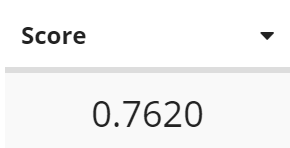

In [17]:
display_png(file='rf_pic.png')

## Best Gradient Boosting Model

Explanatory text

In [9]:
# Create gradient boosting model
boost=gbm(status_group~.,data=train,n.trees=1000,interaction.depth=16, n.minobsinnode=10, bag.fraction = .3, cv.folds = 5, shrinkage = .001) , verbose = FALSE)

Distribution not specified, assuming multinomial ...


In [12]:
# Predict on preliminary test set
boost.predsNumeric =predict(boost,newdata=test,n.trees=1000, type="response")
boost.preds= colnames(boost.predsNumeric)[apply(boost.predsNumeric,1,which.max)]

In [13]:
# Create confusion matrix
confusion = table(test_Y, boost.preds, dnn=c("Actual","Predicted"))
confusion

                         Predicted
Actual                    functional functional needs repair non functional
  functional                     954                      25            138
  functional needs repair         71                      26             33
  non functional                 213                       9            531

**Gradient Boosting Model Results**

In [14]:
# Caclulate error rate and accuracy
boost.error<-(sum(confusion[1,2:3],confusion[2,1],confusion[2,3],confusion[3,1:2])/sum(confusion))
boost.accuracy = 1 - boost.error

boost.results = c(boost.error, boost.accuracy)
names(boost.results) = c('Error Rate','Accuracy')
boost.results

Error Rate   Accuracy 
    0.2445     0.7555

** Predict on challenge test set**

In [16]:
boost.challengeNumeric = predict(boost, newdata=challenge_test,n.trees=1000, type="response")
boost.challenge = colnames(boost.challengeNumeric)[apply(boost.challengeNumeric,1,which.max)]

**Write to CSV file for submission**

In [17]:
boost.challenge_format = cbind.data.frame(challenge_test$id,boost.challenge)
colnames(boost.challenge_format) = c('id','status_group')
write.csv(boost.challenge_format, file = "boost_predictions.csv",row.names=FALSE)

head(boost.challenge_format)

id,status_group
50785,functional
51630,functional
17168,non functional
45559,non functional
49871,functional
52449,functional


**Score given by challenge website**

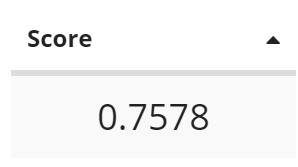

In [18]:
display_png(file='boost_pic.png')

## Best Support Vector Machine Model

Explanatory text

In [19]:
# Create SVM model
svm.radial = svm(status_group~., data=train, kernel='radial', cost=8)

**Support Vector Machine Results**

In [20]:
# Predict on preliminary test set
svm.preds = predict(svm.radial, newdata=test)

In [21]:
# Create confusion matrix
confusion <- table(obs=test_Y, pred=svm.preds)
confusion

                         pred
obs                       functional functional needs repair non functional
  functional                    1003                      26             88
  functional needs repair         83                      31             16
  non functional                 197                      13            543

In [22]:
#caclulate error rate and accuracy
svm.error<-(sum(confusion[1,2:3],confusion[2,1],confusion[2,3],confusion[3,1:2])/sum(confusion))
svm.accuracy = 1 - svm.error

svm.results = c(svm.error, svm.accuracy)
names(svm.results) =  c('Error Rate','Accuracy')
svm.results

Error Rate   Accuracy 
    0.2115     0.7885

** Predict on challenge test set**

In [23]:
svm.challenge = predict(svm.radial, newdata=challenge_test)

**Write to CSV file for submission**

In [24]:
svm.challenge_format = cbind.data.frame(challenge_test$id,svm.challenge)
colnames(svm.challenge_format) = c('id','status_group')
write.csv(svm.challenge_format, file = "svm_predictions.csv",row.names=FALSE)

head(svm.challenge_format)

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional


**Score given by challenge website**

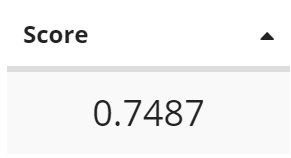

In [25]:
display_png(file='svm_pic.png')

## Model Comparison

Explanatory text

In [28]:
challenge_results = c(0.7620,0.7578,0.7487)
names(challenge_results) = c('Random Forest', 'Gradient Boost', 'Support Vector Machine')
results = cbind.data.frame(rf.results,boost.results,svm.results)
results = rbind(results, challenge_results)
rownames(results)[3] = 'Challenge Set Accuracy'
results



,rf.results,boost.results,svm.results
Error Rate,0.2115,0.2445,0.2115
Accuracy,0.7885,0.7555,0.7885
Challenge Set Accuracy,0.7620,0.7578,0.7487
